In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
news = pd.read_csv('../../csv_files/news/abc_news_clean.csv')

In [4]:
news['publish_date'] = pd.to_datetime(news['publish_date'])
news['financial_year'] = pd.to_datetime(news['financial_year'])

In [5]:
news.dtypes

publish_date      datetime64[ns]
headline_text             object
financial_year    datetime64[ns]
dtype: object

In [6]:
news

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
...,...,...,...
1186013,2019-12-31,vision of flame approach corryong in victoria,2019-07-01
1186014,2019-12-31,wa police and govern backflip on drug amnesti bin,2019-07-01
1186015,2019-12-31,we have fear for their safeti victorian premier,2019-07-01
1186016,2019-12-31,when do the start,2019-07-01


In [7]:
news.isna().sum()

publish_date       0
headline_text     12
financial_year     0
dtype: int64

In [8]:
news.loc[(news['headline_text'].isna())]

,publish_date,headline_text,financial_year
235989,2006-05-11,NaN,2005-07-01
236757,2006-05-15,NaN,2005-07-01
243358,2006-06-15,NaN,2005-07-01
254803,2006-08-10,NaN,2006-07-01
274837,2006-12-19,NaN,2006-07-01
603318,2011-03-25,NaN,2010-07-01
658067,2011-12-07,NaN,2011-07-01
771294,2013-03-18,NaN,2012-07-01
782023,2013-04-26,NaN,2012-07-01
784872,2013-05-08,NaN,2012-07-01


In [9]:
news = news[~(news['headline_text'].isna())]

In [10]:
news.isna().sum()

publish_date      0
headline_text     0
financial_year    0
dtype: int64

In [11]:
news = news.reset_index(drop=True)

In [12]:
news

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
...,...,...,...
1186001,2019-12-31,vision of flame approach corryong in victoria,2019-07-01
1186002,2019-12-31,wa police and govern backflip on drug amnesti bin,2019-07-01
1186003,2019-12-31,we have fear for their safeti victorian premier,2019-07-01
1186004,2019-12-31,when do the start,2019-07-01


## Start exploring text content

In [25]:
news['financial_year'].value_counts()

2012-07-01    93571
2013-07-01    86497
2011-07-01    81545
2007-07-01    79743
2008-07-01    78062
2010-07-01    76405
2014-07-01    76302
2009-07-01    75475
2005-07-01    73496
2015-07-01    73026
2004-07-01    72856
2003-07-01    72753
2006-07-01    67688
2016-07-01    53233
2017-07-01    44629
2018-07-01    36344
2002-07-01    27436
2019-07-01    16945
Name: financial_year, dtype: int64

Above shows an overall decrease in number of news headings over time - need to check the rate of immigration articles as % of total for the year

In [14]:
subset2018_19 = news.loc[(news['financial_year'] == '2018-07-01')]

### Select words related to migration to include in subset of migration-related news

In [15]:
news[news["headline_text"].str.contains("migrant")].head(10)

,publish_date,headline_text,financial_year
10050,2003-04-08,council plan to attract more migrant,2002-07-01
14225,2003-04-28,suicide prevent help on the way for migrant,2002-07-01
19092,2003-05-22,mp back migrant boost scheme,2002-07-01
22390,2003-06-06,ruddock in spotlight over busi migrant,2002-07-01
25313,2003-06-20,new handbook to help migrant understand right,2002-07-01
25993,2003-06-24,alp look at increas migrant in region area,2002-07-01
26117,2003-06-24,migrant plan aim to boost region growth,2002-07-01
26361,2003-06-25,mayor offer migrant plan support,2002-07-01
26631,2003-06-26,push on to boost region migrant number,2002-07-01
28466,2003-07-06,crean say dont cut migrant but improve polici,2003-07-01


In [16]:
news[news["headline_text"].str.contains("refugee")].head(10)

,publish_date,headline_text,financial_year
1788,2003-02-27,fund drought restrict iraqi refugee plan,2002-07-01
1860,2003-02-27,refugee support aim to raise appeal fund,2002-07-01
1928,2003-02-27,young push for refugee perman resid,2002-07-01
2142,2003-02-28,three children wound in gaza strip refugee camp,2002-07-01
2792,2003-03-04,call for refugee to be given visa certainti,2002-07-01
3067,2003-03-05,labor advocate special visa for e timor refugee,2002-07-01
3185,2003-03-05,un monitor indonesian refugee in png,2002-07-01
3307,2003-03-06,israel answer bu bomb die in refugee camp,2002-07-01
3383,2003-03-06,special visa wont help timor refugee clp,2002-07-01
3589,2003-03-07,refugee famili await lawyer return,2002-07-01


In [17]:
news[news["headline_text"].str.contains("asylum")].head(10)

,publish_date,headline_text,financial_year
114,2003-02-19,nth korean seek asylum at japanese embassi,2002-07-01
217,2003-02-20,british high court overturn new blair asylum,2002-07-01
475,2003-02-21,british govt clash with high court over asylum,2002-07-01
2262,2003-03-01,italian township offer saddam asylum,2002-07-01
2368,2003-03-02,asylum seeker support centre face closure,2002-07-01
3934,2003-03-10,asylum seeker face court over baxter escape,2002-07-01
4098,2003-03-10,ruddock foreshadow plan to deport iranian asylum,2002-07-01
4156,2003-03-11,brack want asylum seeker to stay,2002-07-01
4456,2003-03-12,iranian asylum seeker frighten after detent,2002-07-01
4849,2003-03-14,church air asylum seeker concern,2002-07-01


In [18]:
migrant_news = news.copy()

### Make migration news subset

In [19]:
migrant_words = ['refugee', 'refugees', 'migrant', 'migrants', 'asylum', 'immigr']

pattern = '|'.join(migrant_words)

In [20]:
migrant_news['migrant_news_col'] = migrant_news['headline_text'].str.contains(pattern)

In [21]:
migrant_news = migrant_news[(migrant_news['migrant_news_col'] == True)]
migrant_news

,publish_date,headline_text,financial_year,migrant_news_col
114,2003-02-19,nth korean seek asylum at japanese embassi,2002-07-01,True
217,2003-02-20,british high court overturn new blair asylum,2002-07-01,True
293,2003-02-20,immigr raid in melbourne draw flak,2002-07-01,True
337,2003-02-20,more than detain after immigr raid,2002-07-01,True
379,2003-02-20,protocol were follow in immigr raid,2002-07-01,True
...,...,...,...,...
1185239,2019-12-19,medevac refugee lock in melbourne hotel,2019-07-01,True
1185617,2019-12-24,hobart church christma philippine and refugee famili,2019-07-01,True
1185626,2019-12-24,melbourne council offer asylum seeker in hotel free service,2019-07-01,True
1185673,2019-12-25,no retir yet for italian migrant turn supermarket mogul,2019-07-01,True


In [22]:
migrant_news['financial_year'].value_counts()

2015-07-01    847
2013-07-01    710
2012-07-01    633
2014-07-01    575
2010-07-01    545
2016-07-01    535
2009-07-01    436
2011-07-01    430
2003-07-01    363
2005-07-01    346
2017-07-01    335
2018-07-01    304
2004-07-01    288
2006-07-01    244
2008-07-01    243
2007-07-01    192
2002-07-01    125
2019-07-01     81
Name: financial_year, dtype: int64

## Check the migrant_news value counts as a percentage of the overall number of news articles per financial year

The financial_year values represent the year starting from the date provided. E.g. 2002-07-01 refers to the period of 1 July 2002 to 30 June 2003. This format makes it possible to compare the news dataset with the Australian government immigration data that 

In [25]:
news_perc = migrant_news['financial_year'].value_counts() / news[
                        'financial_year'].value_counts() * 100

news_perc

2002-07-01    0.455606
2003-07-01    0.498948
2004-07-01    0.395300
2005-07-01    0.470774
2006-07-01    0.360477
2007-07-01    0.240773
2008-07-01    0.311291
2009-07-01    0.577675
2010-07-01    0.713304
2011-07-01    0.527316
2012-07-01    0.676492
2013-07-01    0.820838
2014-07-01    0.753584
2015-07-01    1.159861
2016-07-01    1.005016
2017-07-01    0.750633
2018-07-01    0.836452
2019-07-01    0.478017
Freq: AS-JUL, Name: financial_year, dtype: float64

In [30]:
news_perc_df = news_perc.to_frame()
type(news_perc_df)

pandas.core.frame.DataFrame

In [32]:
news_perc_df

,financial_year
2002-07-01,0.455606
2003-07-01,0.498948
2004-07-01,0.395300
2005-07-01,0.470774
2006-07-01,0.360477
2007-07-01,0.240773
2008-07-01,0.311291
2009-07-01,0.577675
2010-07-01,0.713304
2011-07-01,0.527316


In [33]:
news_perc_df = news_perc_df.reset_index()

In [34]:
news_perc_df

,index,financial_year
0,2002-07-01,0.455606
1,2003-07-01,0.498948
2,2004-07-01,0.395300
3,2005-07-01,0.470774
4,2006-07-01,0.360477
5,2007-07-01,0.240773
6,2008-07-01,0.311291
7,2009-07-01,0.577675
8,2010-07-01,0.713304
9,2011-07-01,0.527316


In [35]:
news_perc_df.dtypes

index             datetime64[ns]
financial_year           float64
dtype: object

In [36]:
news_perc_df = news_perc_df.rename(
                    columns={'index': 'financial_year',
                            'financial_year': 'percentage'})

In [37]:
news_perc_df

,financial_year,percentage
0,2002-07-01,0.455606
1,2003-07-01,0.498948
2,2004-07-01,0.395300
3,2005-07-01,0.470774
4,2006-07-01,0.360477
5,2007-07-01,0.240773
6,2008-07-01,0.311291
7,2009-07-01,0.577675
8,2010-07-01,0.713304
9,2011-07-01,0.527316


## Plot news percentage time evolution

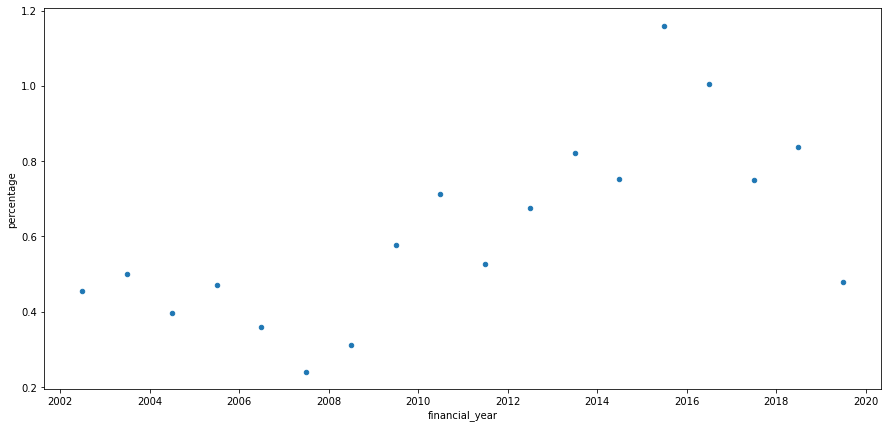

In [39]:
ax2 = news_perc_df.plot.scatter(x='financial_year', y='percentage', figsize=(15,7))

- general positive trend- amount of news coverage on migration has increased over time
- coverage % has tripled from 2002-03 to 2015-16
- decrease in coverage 2006-09, possible slight dip from 2003 to 2008/9
- increase 2008-09, 2009-10
- increase from 2014-15, peak at 2015-16
- slow decrease after 2016, big drop from 2018-19 to 2019-20

In [41]:
news_perc_df['year_only'] = pd.DatetimeIndex(news_perc_df['financial_year']).year

In [42]:
news_perc_df

,financial_year,percentage,year_only
0,2002-07-01,0.455606,2002
1,2003-07-01,0.498948,2003
2,2004-07-01,0.395300,2004
3,2005-07-01,0.470774,2005
4,2006-07-01,0.360477,2006
5,2007-07-01,0.240773,2007
6,2008-07-01,0.311291,2008
7,2009-07-01,0.577675,2009
8,2010-07-01,0.713304,2010
9,2011-07-01,0.527316,2011


In [44]:
news_perc_df.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                  int64
dtype: object

In [45]:
news_perc_df['year_only'] = pd.to_numeric(news_perc_df['year_only'], downcast='float')

In [46]:
news_perc_df.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                float32
dtype: object

In [47]:
news_perc_df = (news_perc_df
              .sort_values("financial_year")
              .assign(t=range(1, len(news_perc_df)+1)))

In [49]:
news_perc_df

,financial_year,percentage,year_only,t
0,2002-07-01,0.455606,2002.0,1
1,2003-07-01,0.498948,2003.0,2
2,2004-07-01,0.395300,2004.0,3
3,2005-07-01,0.470774,2005.0,4
4,2006-07-01,0.360477,2006.0,5
5,2007-07-01,0.240773,2007.0,6
6,2008-07-01,0.311291,2008.0,7
7,2009-07-01,0.577675,2009.0,8
8,2010-07-01,0.713304,2010.0,9
9,2011-07-01,0.527316,2011.0,10


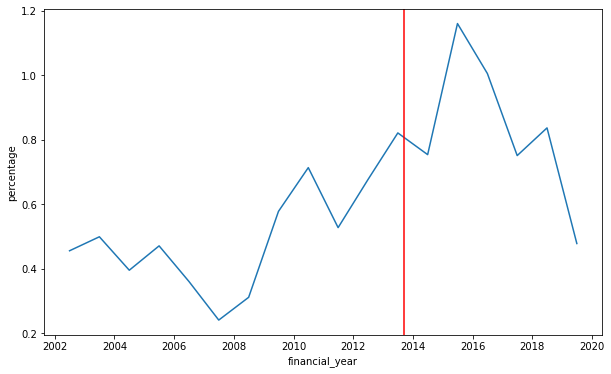

In [52]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=news_perc_df, 
             x="financial_year", 
             y="percentage", 
             ax=ax);

#operation sovereign borders & election to more conservative political party with stricter immigration policy
ax.axvline(pd.to_datetime("2013-09-18"), color="red")
#September 18, 2013

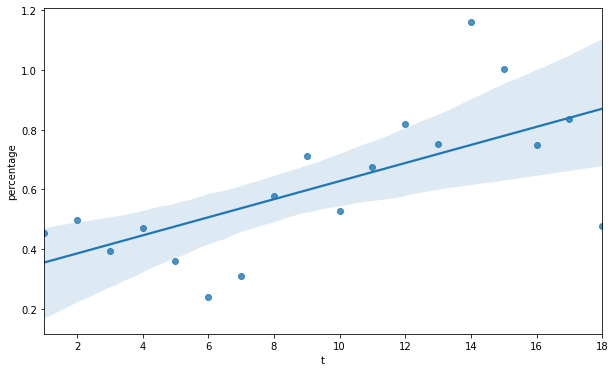

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=news_perc_df, 
             x="t", 
             y="percentage", 
             ax=ax);

## export news_perc_df to csv

In [322]:
news_perc_df.to_csv('migr_news_year_percent.csv', sep=',', index=False, date_format='%Y-%m-%d')